# Exploratory Data Analysis 
   ### Build data profile tables and plots
   Outliers & Anomalies
   Explore data relationships
   Identification and creation of features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import random
import os
#load python packages

import datetime
import seaborn as sns

%matplotlib inline

## Import trimmed Data

In [2]:
df = pd.read_csv('Data/BigMartData_output.csv')

In [3]:
df.drop(['Customer Lname','Customer Password',], axis = 1, inplace = True)

keepers = ['Actual_Ship_Days','Days for shipment (scheduled)', 'Delivery_Status','Late_delivery_risk','Category_Id', 'Category Name','Customer State', 'Customer Zipcode', 'Order City','Order Country','Order_Region','Order_State', 'Shipping_Mode','Order_Status']

dff = df[keepers].copy()


## Clean Up Column Headings

In [4]:
dff.rename(columns = {'Days for shipment (scheduled)':'Scheduled_Days_Ship'}, inplace = True)
dff.rename(columns = {'Category Name':'Category_Name', 'Customer State':'Customer_State','Customer Zipcode':'Customer_Zipcode'}, inplace = True)
dff.rename(columns = {'Order City':'Order_City', 'Order State':'Order_State','Order Country':'Order_Country'}, inplace = True)


dff.head(10)

,Actual_Ship_Days,Scheduled_Days_Ship,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_State,Customer_Zipcode,Order_City,Order_Country,Order_Region,Order_State,Shipping_Mode,Order_Status
0,3,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Bekasi,Indonesia,Southeast Asia,Java Occidental,Standard Class,COMPLETE
1,5,4,Late delivery,1,73,Sporting Goods,PR,725.0,Bikaner,India,South Asia,Rajastán,Standard Class,PENDING
2,4,4,Shipping on time,0,73,Sporting Goods,CA,95125.0,Bikaner,India,South Asia,Rajastán,Standard Class,CLOSED
3,3,4,Advance shipping,0,73,Sporting Goods,CA,90027.0,Townsville,Australia,Oceania,Queensland,Standard Class,COMPLETE
4,2,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Townsville,Australia,Oceania,Queensland,Standard Class,PENDING_PAYMENT
5,6,4,Shipping canceled,0,73,Sporting Goods,NY,14150.0,Toowoomba,Australia,Oceania,Queensland,Standard Class,CANCELED
6,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,COMPLETE
7,2,1,Late delivery,1,73,Sporting Goods,FL,33162.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,PROCESSING
8,3,2,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,Eastern Asia,Guangdong,Second Class,CLOSED
9,2,1,Late delivery,1,73,Sporting Goods,CA,94583.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,CLOSED


## Order Status Review

There are a lot of different possible status for an order.

Considering we are concerned with delivery efficiency, only the COMPLETE orders need to be evaluated.


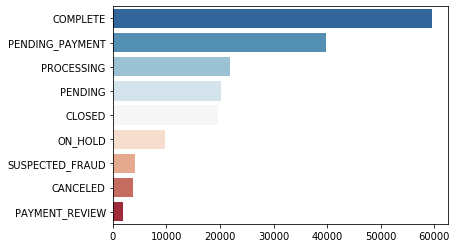

In [5]:
# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(dff.Order_Status.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Order_Status)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

## Delivery Status Review

Delivery status has four categories of which, shipping canceled is of no interest because the order was not shipped. - We will remove those from the evaluation.

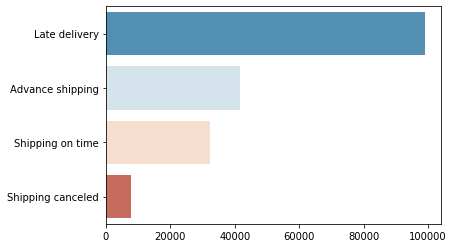

In [6]:
# In the following brackets, we want the value_counts() of the states 
x = pd.DataFrame(df.Delivery_Status.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.state into the list() function
values = list(x.Delivery_Status)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="RdBu_r")

In [7]:
status = ['COMPLETE']
df_late = dff[dff.Order_Status.isin(status)].copy()
df_late.head(10)
df_late.shape


(59491, 14)

## Visualize the Delivery Status of COMPLETED ORDERS
Late Delivery vs Advanced Shipping vs Shipping on Time - the cancelled orders.

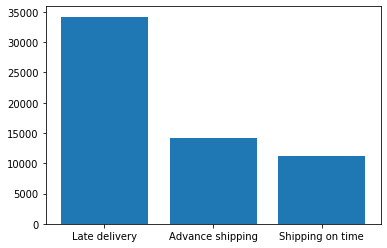

Late delivery       34199
Advance shipping    14136
Shipping on time    11156
Name: Delivery_Status, dtype: int64
(14136, 14)


In [8]:
_= plt.bar(df_late['Delivery_Status'].value_counts().index, (df_late['Delivery_Status'].value_counts()))
plt.show()
del_status_totals = df_late['Delivery_Status'].value_counts()
print(del_status_totals)
total_late = df_late[df_late.Delivery_Status == 'Advance shipping']
print(total_late.shape)


### Visualize Late Deliveries by Region

There are only 23 regions vs way to many to evaluate for countries and cities unless we narrowed or dataset to a country

<function matplotlib.pyplot.show(*args, **kw)>

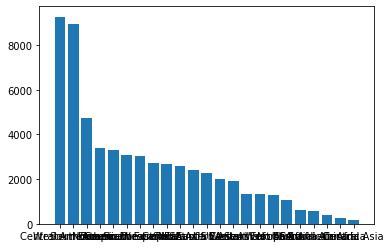

In [9]:
_= plt.bar(df_late['Order_Region'].value_counts().index, (df_late['Order_Region'].value_counts()))
plt.show


In [10]:
print(df_late.nunique())

df_late['Delivery_Status'].isnull().sum()

Actual_Ship_Days          7
Scheduled_Days_Ship       4
Delivery_Status           3
Late_delivery_risk        2
Category_Id              51
Category_Name            50
Customer_State           46
Customer_Zipcode        994
Order_City             3010
Order_Country           151
Order_Region             23
Order_State             976
Shipping_Mode             4
Order_Status              1
dtype: int64


0

## Evaluate Shipping Method/Mode

<function matplotlib.pyplot.show(*args, **kw)>

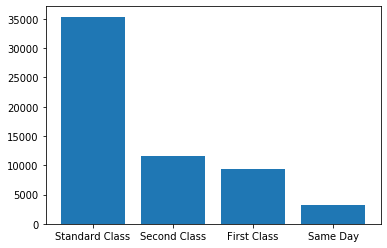

In [11]:
_= plt.bar(df_late['Shipping_Mode'].value_counts().index, (df_late['Shipping_Mode'].value_counts()))
plt.show


<b>Break down of completed deliveries by shipping MODE

In [16]:
pd.options.display.max_columns=None
df_late.pivot_table(index=['Shipping_Mode'],columns = ['Category_Id','Order_Region'], aggfunc='size', fill_value = 0)

Category_Id           2                                                 \
Order_Region   Caribbean Central America Northern Europe South America   
Shipping_Mode                                                            
First Class            0               3               1             0   
Same Day               0               2               0             0   
Second Class           0               2               0             3   
Standard Class         2               5               5             3   

Category_Id                                       3                            \
Order_Region   Southern Europe Western Europe Canada Caribbean Central Africa   
Shipping_Mode                                                                   
First Class                  0              6      0         2              1   
Same Day                     0              1      0         0              0   
Second Class                 2              4      0         3              1   
Standard Class               5              9      1         5              1   

Category_Id                                                          \
Order_Region   Central America East Africa East of USA Eastern Asia   
Shipping_Mode                                                         
First Class                  4           1           2            1   
Same Day                     3           1           0            0   
Second Class                 5           0           4            0   
Standard Class              19           2           7            5   

Category_Id                                                         \
Order_Region   Eastern Europe North Africa Northern Europe Oceania   
Shipping_Mode                                                        
First Class                 2            1               2       2   
Same Day                    0            0               0       0   
Second Class                0            0               5       2   
Standard Class              3            6               4       8   

Category_Id                                                            \
Order_Region   South America South Asia South of  USA  Southeast Asia   
Shipping_Mode                                                           
First Class                5          0              1              1   
Same Day                   1          0              1              0   
Second Class               3          3              0              2   
Standard Class            11          6              5              4   

Category_Id                                                            \
Order_Region   Southern Africa Southern Europe US Center  West Africa   
Shipping_Mode                                                           
First Class                  0               1          2           0   
Same Day                     0               1          0           0   
Second Class                 0               1          1           2   
Standard Class               2               4          4           2   

Category_Id                                                       4   \
Order_Region   West Asia West of USA  Western Europe Northern Europe   
Shipping_Mode                                                          
First Class            0            3              5               0   
Same Day               0            0              3               0   
Second Class           2            2              2               2   
Standard Class         3            8              9               1   

Category_Id                                          5                  \
Order_Region   Southern Europe Western Europe Caribbean Central Africa   
Shipping_Mode                                                            
First Class                  1              4         0              0   
Same Day                     0              0         0              0   
Second Class             

<b>Breakdown Shipping Mode into delivery status...

In [21]:
test_mode = df_late.pivot_table(index=['Shipping_Mode'], columns = [ 'Delivery_Status'], aggfunc='size', fill_value = 0)

In [ ]:
df_late.pivot_table(index=['Shipping_Mode'], columns = ['Category_Id', 'Delivery_Status'], aggfunc='size', fill_value = 0)

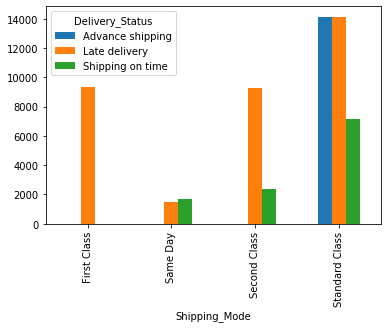

In [22]:
test_mode.plot(kind = 'bar')

This data doesn't make much sense.

<b>Encode Delivery_Status and Hot_encode Order_Region

In [18]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

ship_results = {'Advance shipping': 2, 'Shipping on time': 1, 'Late delivery':0}
df_late['Delivery_Coded']= df_late['Delivery_Status'].apply(set_value, args = (ship_results,))
df_late.head()

,Actual_Ship_Days,Scheduled_Days_Ship,Delivery_Status,Late_delivery_risk,Category_Id,Category_Name,Customer_State,Customer_Zipcode,Order_City,Order_Country,Order_Region,Order_State,Shipping_Mode,Order_Status,Delivery_Coded
0,3,4,Advance shipping,0,73,Sporting Goods,PR,725.0,Bekasi,Indonesia,Southeast Asia,Java Occidental,Standard Class,COMPLETE,2
3,3,4,Advance shipping,0,73,Sporting Goods,CA,90027.0,Townsville,Australia,Oceania,Queensland,Standard Class,COMPLETE,2
6,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Guangzhou,China,Eastern Asia,Guangdong,First Class,COMPLETE,0
13,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Sangli,India,South Asia,Maharashtra,First Class,COMPLETE,0
15,2,1,Late delivery,1,73,Sporting Goods,PR,725.0,Sangli,India,South Asia,Maharashtra,First Class,COMPLETE,0


In [20]:
df_ready = pd.get_dummies(data = df_late, columns = ['Order_Region'], drop_first = True)

In [21]:
df_ready.drop(['Delivery_Status'], axis = 1)
df_ready.columns

Index(['Actual_Ship_Days', 'Scheduled_Days_Ship', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status', 'Delivery_Coded',
       'Order_Region_Caribbean', 'Order_Region_Central Africa',
       'Order_Region_Central America', 'Order_Region_Central Asia',
       'Order_Region_East Africa', 'Order_Region_East of USA',
       'Order_Region_Eastern Asia', 'Order_Region_Eastern Europe',
       'Order_Region_North Africa', 'Order_Region_Northern Europe',
       'Order_Region_Oceania', 'Order_Region_South America',
       'Order_Region_South Asia', 'Order_Region_South of  USA ',
       'Order_Region_Southeast Asia', 'Order_Region_Southern Africa',
       'Order_Region_Southern Europe', 'Order_Region_US Center ',
       'Order_Region_West Africa', 'Order_Region_West Asia',
       'Order_Region_West of USA ', 'Order_Region_Western Europe'],


In [22]:
df_ready.groupby(['Delivery_Status','Delivery_Coded']).size()

Delivery_Status   Delivery_Coded
Advance shipping  2                 14136
Late delivery     0                 34199
Shipping on time  1                 11156
dtype: int64

In [23]:
df_ready.pivot_table(index=['Delivery_Status'],columns = ['Category_Id','Order_Region_Southern Europe'], aggfunc='size', fill_value = 0)

Category_Id                   2       3      4      5      6      ...  67  68  \
Order_Region_Southern Europe   0  1    0  1   0  1   0  1   0  1  ...   1   0   
Delivery_Status                                                   ...           
Advance shipping               7  3   47  1   7  0  29  0  17  0  ...   4  36   
Late delivery                 27  3  115  5  10  1  71  2  55  5  ...  10  92   
Shipping on time              12  1   34  1   1  1  11  1  21  0  ...   3  25   

Category_Id                   69  70  71   72  73   74   75   76  
Order_Region_Southern Europe   0   0   0    0   0    0    0    0  
Delivery_Status                                                   
Advance shipping              29  14  26   42  30   43   64   53  
Late delivery                 86  35  84  103  74  112  152  131  
Shipping on time              21  14  22   28  12   29   56   34  

[3 rows x 93 columns]

In [24]:
df_ready.pivot_table(index=['Category_Id'],columns = ['Delivery_Status','Order_Region_Southern Europe'], aggfunc='size', fill_value = 0)

Delivery_Status              Advance shipping     Late delivery       \
Order_Region_Southern Europe                0   1             0    1   
Category_Id                                                            
2                                           7   3            27    3   
3                                          47   1           115    5   
4                                           7   0            10    1   
5                                          29   0            71    2   
6                                          17   0            55    5   
7                                          44   5           105    5   
9                                         952  46          2228  125   
10                                         10   2            25    2   
11                                         20   0            59    3   
12                                         34   1            68    6   
13                                         78   4           203    9   
16                                          4   1             8    1   
17                                       1802  81          4476  217   
18                                       1694  80          3989  201   
24                                       1557  98          3756  215   
26                                         85   3           217    8   
29                                        823  34          1997  125   
30                                         17   5            43    6   
31                                         13   3            24    5   
32                                         41   1            81    3   
33                                         38   2           106    4   
34                                          5   1            12    2   
35                                         76   3           181   11   
36                                        110   9           280   15   
37                                        151   6           387   14   
38                                         29   3            63   10   
40                                        143   8           342   15   
41                                         77   6           201    8   
43                                        989  54          2436  133   
44                                         41   2            73    6   
45                                       1301  65          3078  150   
46                                       1451  61          3487  178   
48                                       1126  70          2727  151   
59                                         16   5            65    8   
60                                         10   4            37    5   
61                                         19   2            50    9   
62                                         34  11            89   25   
63                                         47  11           102   14   
64                                         39   7            68   13   
65                                         29   7            68   17   
66                                         35   2            86    6   
67                                         41   4            84   10   
68                                         36   0            92    0   
69                                         29   0            86    0   
70                                         14   0            35    0   
71                                         26   0            84    0   
72                                         42   0           103    0   
73                                         30   0            74    0   
74                                         43   0           112    0   
75                                         64   0           152    0   
76                                         53   0           131    0   

Delivery_Status              Shipping on time      
Order_Region_Southern Europe                0   1  
Categor

In [25]:
np.set_printoptions(threshold=100)
from sklearn.cluster import KMeans
X = df_ready.drop(['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Status'], axis = 1).values
y = df_ready['Delivery_Coded']

In [26]:
df_ready.to_csv('BigMartModelData.csv')

In [48]:
print(X.shape)
print(y.shape)
X

(59491, 27)
(59491,)


array([[3, 4, 0, ..., 0, 0, 0],
       [3, 4, 0, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       ...,
       [4, 2, 1, ..., 0, 0, 0],
       [6, 4, 1, ..., 0, 0, 0],
       [3, 2, 1, ..., 0, 0, 0]], dtype=int64)

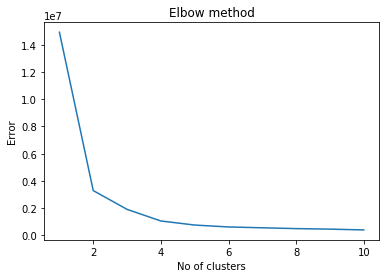

In [51]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

encode: Delivery Status   2: 'Advanced shipping',  1: 'Shipping on Time' , 0: 'Late Delivery'

Hierarchical Clustering: Not very interesting...

Split into train and test for regressions:



In [87]:
from sklearn.model_selection import train_test_split

y = df_ready['Delivery_Coded']
X = df_ready.drop(['Category_Name', 'Customer_State',
       'Customer_Zipcode', 'Order_City', 'Order_Country', 'Order_State',
       'Shipping_Mode', 'Order_Status','Delivery_Status','Delivery_Coded'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

  ##  Linear Model

In [88]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [89]:
y_pred = model.predict(X_test)

In [90]:
print('Explained Variance Score : ', explained_variance_score(y_test, y_pred))

print('Mean Absolute Error : ',mean_absolute_error(y_test, y_pred))

Explained Variance Score :  0.9039845291508178
Mean Absolute Error :  0.20566401844696822


In [91]:
lm.intercept_

1.1992213175972557